# **Bike-share Case Study for year 2019**

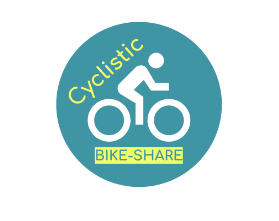

# Table of Contents

* [1. Summary & Ask](#summary)

* [2. Prepare](#prepare)

* [3. Process](#process)

* [4. Analyze](#analyze)

* [5. Share](#share)

* [6. Act](#act)


# 1. Summary  <a class="anchor"  id="summary"></a>

## 1.1 Scenario

You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

## 1.2 Characters and Teams

- **Cyclistic:** A bike-share program featuring more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.
  
- **Lily Moreno:** The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.
  
- **Cyclistic Marketing Analytics Team:** A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.
  
- **Cyclistic Executive Team:** The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

### About the Company

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

# 2. Collect and Load Data <a class="anchor"  id="data"></a>

### 2.1 Install and load required libraries

In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

# Install and load required libraries
library(tidyverse)  #helps wrangle data - metapackage of all tidyverse packages
library(lubridate)  #helps wrangle date attributes
library(ggplot2)  #helps visualize data

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "bikeshare-trips-2019"

### 2.2 Collect and load Bike-share data of year 2019

In [2]:
# Load data for each quarter
q1_2019 <- read_csv("/kaggle/input/bikeshare-trips-2019/Divvy_Trips_2019_Q1.csv")
q2_2019 <- read_csv("/kaggle/input/bikeshare-trips-2019/Divvy_Trips_2019_Q2.csv")
q3_2019 <- read_csv("/kaggle/input/bikeshare-trips-2019/Divvy_Trips_2019_Q3.csv")
q4_2019 <- read_csv("/kaggle/input/bikeshare-trips-2019/Divvy_Trips_2019_Q4.csv")

Rows: 365069 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): from_station_name, to_station_name, usertype, gender
dbl  (5): trip_id, bikeid, from_station_id, to_station_id, birthyear
num  (1): tripduration
dttm (2): start_time, end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1108163 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): 03 - Rental Start Station Name, 02 - Rental End Station Name, User...
dbl  (5): 01 - Rental Details Rental ID, 01 - Rental Details Bike ID, 03 - R...
num  (1): 01 - Rental Details Duration In Seconds Uncapped
dttm (2): 01 - Rental Details Local Start Time, 01 - Rental Details Local En...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_

In [3]:
head(q1_2019)
head(q2_2019)
head(q3_2019)
head(q4_2019)

trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989
21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990
21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994
21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,1783,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993
21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994
21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,216,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983


01 - Rental Details Rental ID,01 - Rental Details Local Start Time,01 - Rental Details Local End Time,01 - Rental Details Bike ID,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station ID,03 - Rental Start Station Name,02 - Rental End Station ID,02 - Rental End Station Name,User Type,Member Gender,05 - Member Details Member Birthday Year
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975
22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,1048,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984
22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990
22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993
22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,1007,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992
22178534,2019-04-01 00:19:39,2019-04-01 00:23:56,3123,257,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,Subscriber,Male,1999


trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,1214,117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992
23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,1048,381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NA,NA
23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,1554,313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NA,NA
23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,1503,313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NA,NA
23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,1213,168,Michigan Ave & 14th St,62,McCormick Place,Customer,NA,NA
23479393,2019-07-01 00:02:21,2019-07-01 00:07:31,4941,310,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990


trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987
25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998
25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991
25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,2350,313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990
25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,1867,210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987
25223645,2019-10-01 00:04:38,2019-10-01 00:10:51,1891,373,156,Clark St & Wellington Ave,226,Racine Ave & Belmont Ave,Subscriber,Female,1994


# 3. Preparation and Cleaning <a class="anchor" id="prepare"></a>

### 3.1  Wrangle data and combine into 1 file 

In [4]:
# Compare column names each of the files
# While the names don't have to be in the same order, they DO need to match perfectly before we can use a command to join them into one file
colnames(q1_2019)
colnames(q2_2019)
colnames(q3_2019)
colnames(q4_2019)

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "01 - Rental Details Rental ID"                   
 [2] "01 - Rental Details Local Start Time"            
 [3] "01 - Rental Details Local End Time"              
 [4] "01 - Rental Details Bike ID"                     
 [5] "01 - Rental Details Duration In Seconds Uncapped"
 [6] "03 - Rental Start Station ID"                    
 [7] "03 - Rental Start Station Name"                  
 [8] "02 - Rental End Station ID"                      
 [9] "02 - Rental End Station Name"                    
[10] "User Type"                                       
[11] "Member Gender"                                   
[12] "05 - Member Details Member Birthday Year"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

* #### Notice that column names of second quarter are not same as other quarter data.
* #### To merge data into a single file, the column names and format must be the same for consistent stacking.

In [5]:
# Rename columns to make them consisent

old <- c("01 - Rental Details Rental ID",
         "01 - Rental Details Local Start Time",
         "01 - Rental Details Local End Time",
         "01 - Rental Details Bike ID",
         "01 - Rental Details Duration In Seconds Uncapped",
         "03 - Rental Start Station ID",
         "03 - Rental Start Station Name",
         "02 - Rental End Station ID",
         "02 - Rental End Station Name",
         "User Type","Member Gender",
         "05 - Member Details Member Birthday Year")
new <- c("trip_id",
         "start_time",
         "end_time",
         "bikeid",
         "tripduration",
         "from_station_id",
         "from_station_name",
         "to_station_id",
         "to_station_name",
         "usertype",
         "gender",
         "birthyear")
q2_2019 <- q2_2019 %>% 
  rename_with(~ new, all_of(old))

# Inspect the dataframes and look for inconguencies
# str(q1_2019)
# str(q2_2019)
# str(q3_2019)
# str(q4_2019)

# Stack individual quarter's data frames into one big data frame
all_trips <- bind_rows(q1_2019, q2_2019, q3_2019, q4_2019)

# Compare column names each of the files
# While the names don't have to be in the same order, they DO need to match perfectly before we can use a command to join them into one file
colnames(q1_2019)
colnames(q2_2019)
colnames(q3_2019)
colnames(q4_2019)

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"


### 3.2 Inspect and clean data to prepare for analysis
* #### Inspect the table of newly merged data


In [6]:
# Inspect the new table that has been created
colnames(all_trips)  #List of column names
nrow(all_trips)  #How many rows are in data frame?
dim(all_trips)  #Dimensions of the data frame?
head(all_trips)  #See the first 6 rows of data frame.  Also tail(qs_raw)
str(all_trips)  #See list of columns and data types (numeric, character, etc)
summary(all_trips)  #Statistical summary of data. Mainly for numerics

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] 3818004

[1] 3818004      12

trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989
21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990
21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994
21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,1783,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993
21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994
21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,216,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983


spc_tbl_ [3,818,004 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ trip_id          : num [1:3818004] 21742443 21742444 21742445 21742446 21742447 ...
 $ start_time       : POSIXct[1:3818004], format: "2019-01-01 00:04:37" "2019-01-01 00:08:13" ...
 $ end_time         : POSIXct[1:3818004], format: "2019-01-01 00:11:07" "2019-01-01 00:15:34" ...
 $ bikeid           : num [1:3818004] 2167 4386 1524 252 1170 ...
 $ tripduration     : num [1:3818004] 390 441 829 1783 364 ...
 $ from_station_id  : num [1:3818004] 199 44 15 123 173 98 98 211 150 268 ...
 $ from_station_name: chr [1:3818004] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ to_station_id    : num [1:3818004] 84 624 644 176 35 49 49 142 148 141 ...
 $ to_station_name  : chr [1:3818004] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ usertype         : chr [1:3818004] "Subscriber" "Subscriber"

    trip_id           start_time                     end_time                  
 Min.   :21742443   Min.   :2019-01-01 00:04:37   Min.   :2019-01-01 00:11:07  
 1st Qu.:22873787   1st Qu.:2019-05-29 15:49:26   1st Qu.:2019-05-29 16:09:28  
 Median :23962320   Median :2019-07-25 17:50:54   Median :2019-07-25 18:12:23  
 Mean   :23915629   Mean   :2019-07-19 21:47:37   Mean   :2019-07-19 22:11:47  
 3rd Qu.:24963703   3rd Qu.:2019-09-15 06:48:05   3rd Qu.:2019-09-15 08:30:13  
 Max.   :25962904   Max.   :2019-12-31 23:57:17   Max.   :2020-01-21 13:54:35  
                                                                               
     bikeid      tripduration      from_station_id from_station_name 
 Min.   :   1   Min.   :      61   Min.   :  1.0   Length:3818004    
 1st Qu.:1727   1st Qu.:     411   1st Qu.: 77.0   Class :character  
 Median :3451   Median :     709   Median :174.0   Mode  :character  
 Mean   :3380   Mean   :    1450   Mean   :201.7                     
 3rd Qu.:5

* #### Check unique values in gender columns

In [7]:
# unique values in gender columns
total_gender <- length(unique(all_trips$gender))
View(total_gender)
unique_gender <- unique(all_trips$gender)
View(unique_gender)
gender_counts <- table(all_trips$gender)
View(gender_counts)

[1] 3

[1] "Male"   "Female" NA


 Female    Male 
 857978 2400820 

* #### Check unique values in usertype column

In [8]:
# unique values in usertype column
total_usertype <- length(unique(all_trips$usertype))
View(total_usertype)
unique_usertype <- unique(all_trips$usertype)
View(unique_usertype)
table(all_trips$usertype)

[1] 2

[1] "Subscriber" "Customer"


  Customer Subscriber 
    880637    2937367 

* #### Rename Subscriber to member and Customer to Casual

In [9]:
# Renaming usertypes 
all_trips <-  all_trips %>% 
  mutate(usertype = recode(usertype
                           ,"Subscriber" = "member"
                           ,"Customer" = "casual"))
# verify
table(all_trips$usertype)


 casual  member 
 880637 2937367 

* #### Add columns that list the date, month, day, year, ride duration, weekday of each ride

In [10]:
# Add columns that list the date, month, day, and year of each ride
all_trips$date <- as.Date(all_trips$start_time) #The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

# Add a "ride_length" calculation to all_trips (in seconds)
all_trips$ride_length <- difftime(all_trips$end_time, all_trips$start_time)

# Inspect the structure of the columns
str(all_trips)

tibble [3,818,004 × 18] (S3: tbl_df/tbl/data.frame)
 $ trip_id          : num [1:3818004] 21742443 21742444 21742445 21742446 21742447 ...
 $ start_time       : POSIXct[1:3818004], format: "2019-01-01 00:04:37" "2019-01-01 00:08:13" ...
 $ end_time         : POSIXct[1:3818004], format: "2019-01-01 00:11:07" "2019-01-01 00:15:34" ...
 $ bikeid           : num [1:3818004] 2167 4386 1524 252 1170 ...
 $ tripduration     : num [1:3818004] 390 441 829 1783 364 ...
 $ from_station_id  : num [1:3818004] 199 44 15 123 173 98 98 211 150 268 ...
 $ from_station_name: chr [1:3818004] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ to_station_id    : num [1:3818004] 84 624 644 176 35 49 49 142 148 141 ...
 $ to_station_name  : chr [1:3818004] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ usertype         : chr [1:3818004] "member" "member" "member" "member" ...

* #### Calculate and remove ride_length that are in negatives and then transfer it new dataframe

In [11]:
# Convert "ride_length" from Factor to numeric so we can run calculations on the data

is.factor(all_trips$ride_length)
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)
str(all_trips$ride_length)

# count ride_length values in negatives

sum(all_trips$ride_length < 0)

# remove negative rides in new dataset

all_trips_v2 <- all_trips[!(all_trips$ride_length < 0),]

# check ride_length values in negatives

sum(all_trips_v2$ride_length < 0)

[1] FALSE

[1] TRUE

 num [1:3818004] 6.5 7.35 13.82 29.72 6.07 ...


[1] 13

[1] 0

# 4. Descriptive analysis <a class="anchor" id="analyze"></a>

### 4.1 Descriptive analysis on ride_length(trip or ride duration)

* #### A summary of ride trip duration


In [12]:
summary(all_trips_v2$ride_length)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     1.02      6.85     11.82     24.17     21.40 177200.37 

### 4.2 Compare members and casual users by ride duration
* #### Average ride duration

In [13]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$usertype, FUN = mean)

all_trips_v2$usertype,all_trips_v2$ride_length
<chr>,<dbl>
casual,57.01802
member,14.32780


* #### Median of ride duration

In [14]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$usertype, FUN = median)

all_trips_v2$usertype,all_trips_v2$ride_length
<chr>,<dbl>
casual,25.83333
member,9.80000


* #### Maximum ride duration

In [15]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$usertype, FUN = max)

all_trips_v2$usertype,all_trips_v2$ride_length
<chr>,<dbl>
casual,177200.4
member,150943.9


* #### Minimum ride duration

In [16]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$usertype, FUN = min)

all_trips_v2$usertype,all_trips_v2$ride_length
<chr>,<dbl>
casual,1.016667
member,1.016667


### 4.3 Find average ride time by each day for members vs casual users

In [17]:
# See the average ride time by each day for members vs casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$usertype + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$usertype,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<chr>,<dbl>
casual,Friday,60.17561
member,Friday,13.89748
casual,Monday,54.49989
member,Monday,14.24928
casual,Saturday,54.06111
member,Saturday,16.30271
casual,Sunday,56.18519
member,Sunday,15.40290
casual,Thursday,59.95112


### 4.4 Average ride time by days of the week
* #### After noticing the days of week are out of order, arranged them in order of Sun to Sat.

In [18]:
# Notice that the days of the week are out of order. Let's fix that.
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

# Now, let's run the average ride time by each day for members vs casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$usertype + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$usertype,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,56.18519
member,Sunday,15.40290
casual,Monday,54.49989
member,Monday,14.24928
casual,Tuesday,57.41328
member,Tuesday,14.15259
casual,Wednesday,60.33407
member,Wednesday,13.80984
casual,Thursday,59.95112


### 4.5 No of rides and average duration by each day of the week

In [19]:
# analyze ridership data by type and weekday
all_trips_v2 %>% 
  mutate(weekday = wday(start_time, label = TRUE)) %>%  #creates weekday field using wday()
  group_by(usertype, weekday) %>%  #groups by usertype and weekday
  summarise(number_of_rides = n()							#calculates the number of rides and average duration 
  ,average_duration = mean(ride_length)) %>% 		# calculates the average duration
  arrange(usertype, weekday)								# sorts


`summarise()` has grouped output by 'usertype'. You can override using the
`.groups` argument.


usertype,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,170173,56.18519
casual,Mon,101489,54.49989
casual,Tue,88655,57.41328
casual,Wed,89745,60.33407
casual,Thu,101372,59.95112
casual,Fri,121141,60.17561
casual,Sat,208056,54.06111
member,Sun,256234,15.40290
member,Mon,458780,14.24928


### 4.6 No of rides and average duration by each month

In [20]:
all_trips_v2 %>%
  mutate(month_name = month.abb[month(start_time)]) %>%
  mutate(month_name = factor(month_name, levels = month.abb)) %>%
  group_by(usertype, month_name) %>%
  summarise(
    number_of_rides = n(),
    average_duration = mean(ride_length)
  ) %>%
  arrange(usertype, month_name)

`summarise()` has grouped output by 'usertype'. You can override using the
`.groups` argument.


usertype,month_name,number_of_rides,average_duration
<chr>,<fct>,<int>,<dbl>
casual,Jan,4602,47.32472
casual,Feb,2638,145.60485
casual,Mar,15923,52.30590
casual,Apr,47744,50.94245
casual,May,81624,51.23836
casual,Jun,130218,45.92004
casual,Jul,175632,59.78382
casual,Aug,186889,67.00752
casual,Sep,129173,51.66670


# 5. Visualize <a class="anchor"  id="share"></a>

`summarise()` has grouped output by 'usertype'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'usertype'. You can override using the
`.groups` argument.


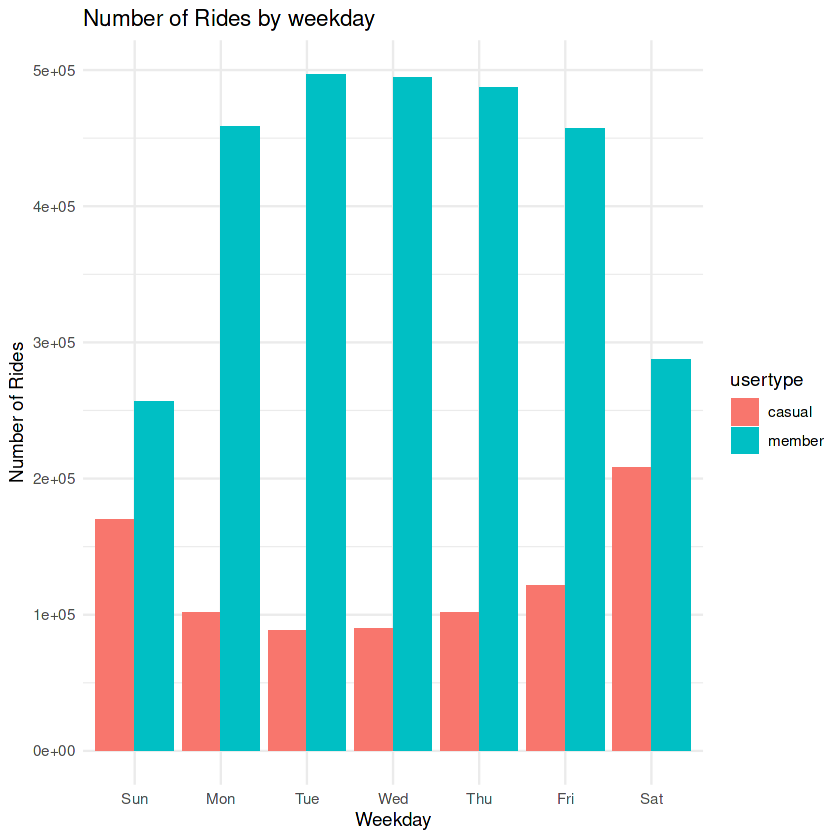

`summarise()` has grouped output by 'usertype'. You can override using the
`.groups` argument.


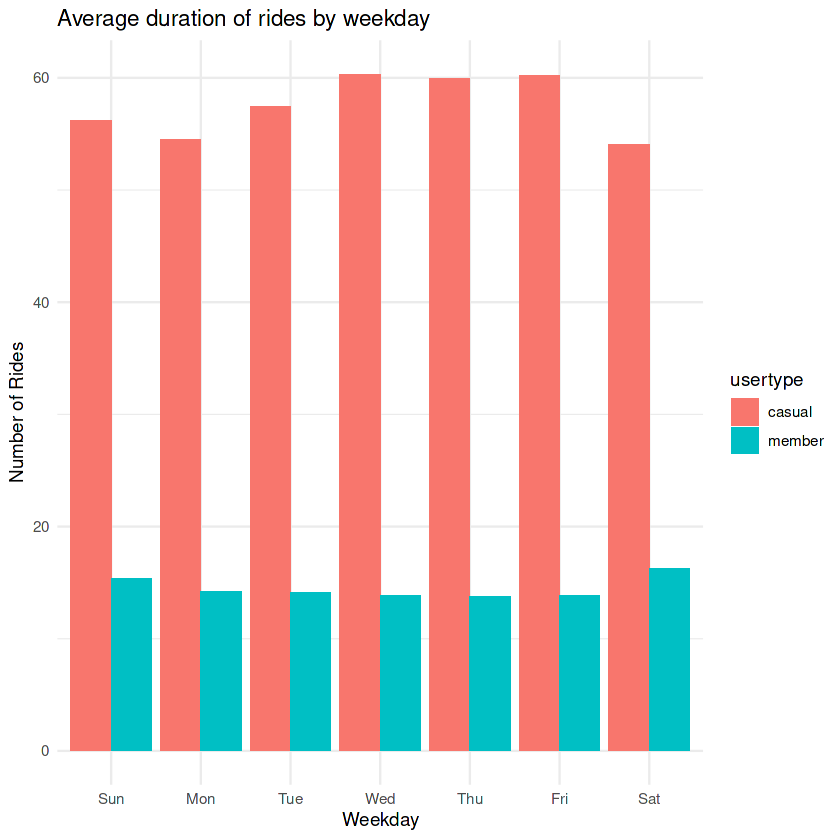

`summarise()` has grouped output by 'usertype'. You can override using the
`.groups` argument.


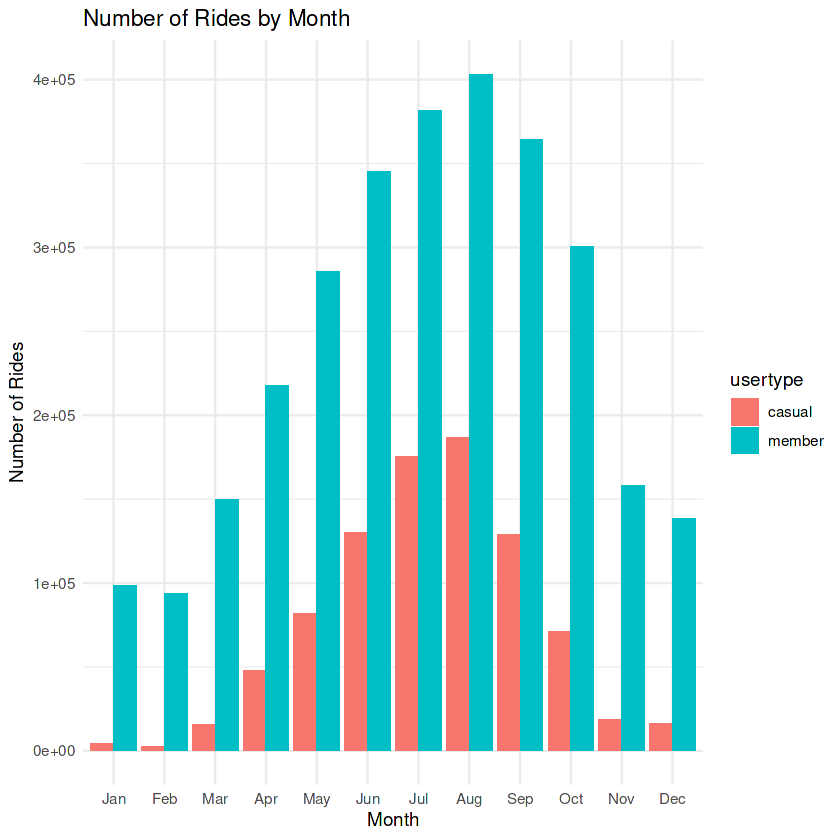

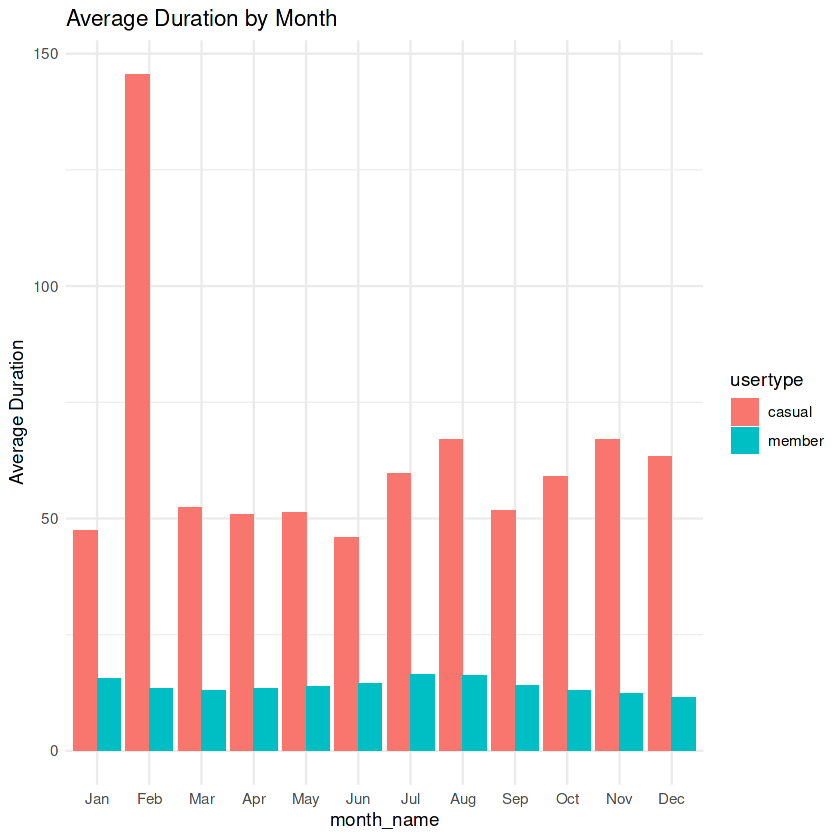

In [21]:
library(ggplot2)
library(dplyr)

all_trips %>%
mutate(weekday = wday(start_time, label = TRUE)) %>%
group_by(usertype, weekday) %>%
summarise(number_of_rides=n(),
         average_duration = mean(ride_length)) %>%
arrange(usertype, weekday) %>%
ggplot(aes(x = weekday, y = number_of_rides, fill = usertype)) +
  geom_col(position = 'dodge') +
  labs(title = "Number of Rides by weekday",
       x = "Weekday",
       y = "Number of Rides") +
  theme_minimal()

# Let's create a visualization for average duration
all_trips_v2 %>% 
  mutate(weekday = wday(start_time, label = TRUE)) %>% 
  group_by(usertype, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(usertype, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = usertype)) +
  geom_col(position = "dodge") +
  labs(title = "Average duration of rides by weekday",
       x = "Weekday",
       y = "Number of Rides") +
  theme_minimal()


#  Number of rides by month and user type


all_trips_v2 %>%
  mutate(month_name = month.abb[month(start_time)]) %>%
  mutate(month_name = factor(month_name, levels = month.abb)) %>%
  group_by(usertype, month_name) %>%
  summarise(
    number_of_rides = n(),
    average_duration = mean(ride_length)
  ) %>%
  arrange(usertype, month_name) %>%
  ggplot(aes(x = month_name, y = number_of_rides, fill = usertype)) +
  geom_bar(position = 'dodge', stat = 'identity') +
  labs(title = "Number of Rides by Month",
       x = "Month",
       y = "Number of Rides") +
  theme_minimal()

# Average Duration by Month and User Type
all_trips_v2 %>%
  mutate(month_name = month.abb[month(start_time)]) %>%
  mutate(month_name = factor(month_name, levels = month.abb)) %>%
  group_by(usertype, month_name) %>%
  summarise(
    number_of_rides = n(),
    average_duration = mean(ride_length)
  ) %>%
  arrange(usertype, month_name) %>%
  ggplot(aes(x = month_name, y = average_duration, fill = usertype)) +
  geom_bar(position = 'dodge', stat = 'identity') +
  labs(title = "Average Duration by Month",
       y = "Average Duration") +
  theme_minimal()

# 6. Conclusion: <a class="anchor"  id="act"></a>

### 1. Casual vs. Member Usage:
   - Casual users exhibit significantly longer average ride durations compared to members.
   - Casual riders contribute substantially to weekend rides, particularly on Saturdays and Sundays, while member rides are evenly spread throughout the week.

### 2. Weekday Analysis:
   - Both casual and member riders experience an increase in rides from Monday to Friday, with Friday being the peak day for casual users.
   - Member riders, however, show a distinctive peak on Mondays and a gradual decline through the week.

### 3. Monthly Trends:
   - Casual ridership peaks during the summer months, notably in July and August, suggesting a potential tourist or seasonal rider trend.
   - Member ridership remains relatively consistent, with a slight dip during the winter months.

### 4. Average Duration:
   - Casual riders consistently have longer average ride durations across all weekdays and months compared to members.


## Recommendations:

### 1. Promotion Strategies:
   - Implement targeted promotions or marketing campaigns for casual users during the summer months to capitalize on peak ridership.
   - Consider offering incentives or promotions for member riders on weekdays, especially on Mondays when member rides peak.

### 2. Service Optimization:
   - Enhance bike availability and service quality during weekends, particularly on Saturdays and Sundays, to accommodate higher demand from casual riders.
   - Explore the potential for introducing shorter-duration ride options to cater to the preferences of member riders who generally prefer shorter rides.

### 3. User Engagement:
   - Encourage user engagement through loyalty programs or exclusive offers for members to boost retention and loyalty year-round.
   - Solicit feedback from both casual and member riders to understand preferences and enhance overall user experience.

### 4. Infrastructure Planning:
   - Assess the need for additional bike stations or resources during peak months, especially in areas with high casual ridership, to ensure a seamless experience for all users.

By implementing these recommendations, the bike-sharing service can improve its offerings, attract and retain users, and optimize operations based on observed patterns in user behavior.

## 7. Export Summary File For Further Analysis

In [22]:
counts <- aggregate(all_trips_v2$ride_length ~ all_trips_v2$usertype + all_trips_v2$day_of_week, FUN = mean)
View(counts)

all_trips_v2$usertype,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,56.18519
member,Sunday,15.40290
casual,Monday,54.49989
member,Monday,14.24928
casual,Tuesday,57.41328
member,Tuesday,14.15259
casual,Wednesday,60.33407
member,Wednesday,13.80984
casual,Thursday,59.95112
